<a href="https://colab.research.google.com/github/deralph/car-prediction-model-kaggle-skill-assesment/blob/main/kaggleAssesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import iqr


from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV,BayesianRidge
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

import re

In [2]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
test=pd.read_csv('test.csv',index_col='id')
train=pd.read_csv('train.csv',index_col='id')

In [4]:
print(test.shape)
print(train.shape)

(36183, 11)
(54273, 12)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54273 entries, 0 to 54272
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         54273 non-null  object
 1   model         54273 non-null  object
 2   model_year    54273 non-null  int64 
 3   milage        54273 non-null  int64 
 4   fuel_type     54273 non-null  object
 5   engine        54273 non-null  object
 6   transmission  54273 non-null  object
 7   ext_col       54273 non-null  object
 8   int_col       54273 non-null  object
 9   accident      54273 non-null  object
 10  clean_title   54273 non-null  object
 11  price         54273 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 5.4+ MB


In [6]:
train.duplicated().sum()

0

In [7]:
train.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [8]:
train.head(2)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250


In [9]:
print(train.describe())
print(train.describe())

       model_year    milage      price
count    54273.00  54273.00   54273.00
mean      2015.09  72746.18   39218.44
std          5.59  50469.49   72826.34
min       1974.00    100.00    2000.00
25%       2012.00  32268.00   15500.00
50%       2016.00  66107.00   28000.00
75%       2019.00 102000.00   45000.00
max       2024.00 405000.00 2954083.00
       model_year    milage      price
count    54273.00  54273.00   54273.00
mean      2015.09  72746.18   39218.44
std          5.59  50469.49   72826.34
min       1974.00    100.00    2000.00
25%       2012.00  32268.00   15500.00
50%       2016.00  66107.00   28000.00
75%       2019.00 102000.00   45000.00
max       2024.00 405000.00 2954083.00


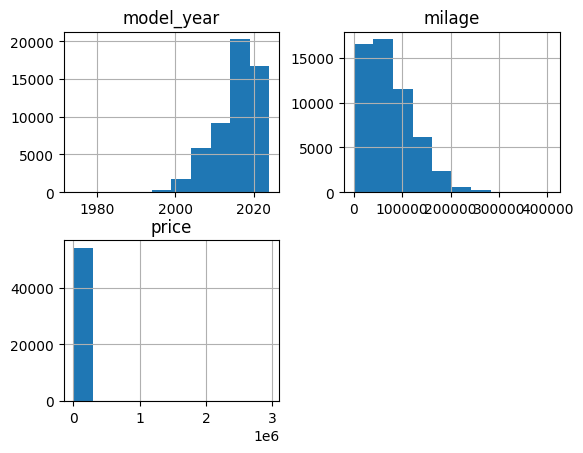

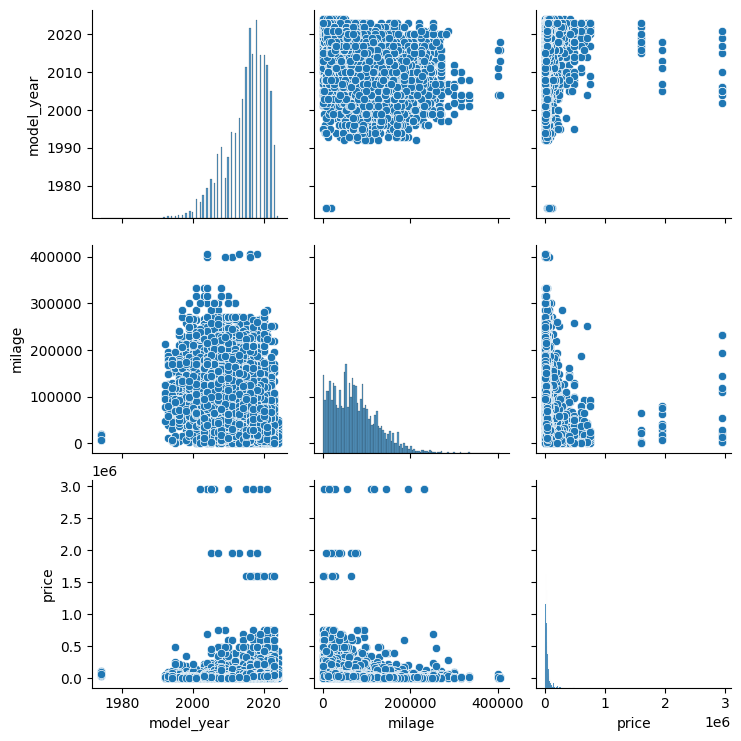

In [10]:
train.hist()
sns.pairplot(data=train)

In [11]:
for dataset in [train,test]:
  print(dataset.isna().sum(),'\n')

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64 

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64 



In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54273 entries, 0 to 54272
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         54273 non-null  object
 1   model         54273 non-null  object
 2   model_year    54273 non-null  int64 
 3   milage        54273 non-null  int64 
 4   fuel_type     54273 non-null  object
 5   engine        54273 non-null  object
 6   transmission  54273 non-null  object
 7   ext_col       54273 non-null  object
 8   int_col       54273 non-null  object
 9   accident      54273 non-null  object
 10  clean_title   54273 non-null  object
 11  price         54273 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 5.4+ MB


In [13]:
categorical_columns = train.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']


In [14]:
for i in categorical_columns:
    print(i)
    print(train[i].unique().shape)
    # print(train[i].value_counts())

brand
(53,)
model
(1827,)
fuel_type
(7,)
engine
(1061,)
transmission
(46,)
ext_col
(260,)
int_col
(124,)
accident
(2,)
clean_title
(1,)


In [15]:
train['clean_title'].value_counts()

clean_title
Yes    54273
Name: count, dtype: int64

In [16]:
for dataset in [train,test]:
  dataset.drop('clean_title',axis=1,inplace=True)

In [17]:
for dataset in [train,test]:
  print(dataset['accident'].value_counts(),'\n')

accident
None reported                             39896
At least 1 accident or damage reported    14377
Name: count, dtype: int64 

accident
None reported                             26598
At least 1 accident or damage reported     9585
Name: count, dtype: int64 



In [18]:
for dataset in [train,test]:
  dataset['accident']=dataset['accident'].apply(lambda x: 'None' if x=='None reported' else 'reported')


In [19]:
for dataset in [train,test]:
  print(dataset['accident'].value_counts(),'\n')

accident
None        39896
reported    14377
Name: count, dtype: int64 

accident
None        26598
reported     9585
Name: count, dtype: int64 



In [20]:
train.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'price'],
      dtype='object')

In [21]:
train['fuel_type'].value_counts()

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
–                   294
Plug-In Hybrid      182
not supported         4
Name: count, dtype: int64

In [22]:
for df in [train,test]:
  df['fuel_type']=df['fuel_type'].apply(lambda x: 'unknown' if (x=='–' or x=='not supported') else x)


In [23]:
for df in [train,test]:
  print(df['fuel_type'].value_counts(),'\n')

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
unknown             298
Plug-In Hybrid      182
Name: count, dtype: int64 

fuel_type
Gasoline          33033
Hybrid             1112
E85 Flex Fuel      1018
Diesel              671
unknown             201
Plug-In Hybrid      148
Name: count, dtype: int64 



In [24]:
print(train['transmission'].value_counts())

transmission
A/T                                                   16757
8-Speed A/T                                            7287
Transmission w/Dual Shift Mode                         6454
6-Speed A/T                                            5944
6-Speed M/T                                            3618
7-Speed A/T                                            3415
10-Speed A/T                                           2187
8-Speed Automatic                                      1189
5-Speed A/T                                            1185
9-Speed A/T                                            1073
4-Speed A/T                                             764
5-Speed M/T                                             718
CVT Transmission                                        692
10-Speed Automatic                                      642
6-Speed Automatic                                       516
Automatic                                               441
M/T                        

In [25]:
def predictTransmissionMode(x):
  x=x.lower()
  if 'dual' in x or 'at/mt' in x:
    return 'dual'
  elif 'scheduled' in x or x=='–' :
    return 'unknown'
  elif 'm/t'in x or 'manual' in x :
    return 'manual'
  elif 'a/t' in x or 'automatic' in x or 'cvt' in x or x=='f'  or x=='variable':
    return 'automatic'

In [26]:
for df in [train,test]:
  df['transmission_mode']=df['transmission'].apply(predictTransmissionMode)

In [27]:
for df in [train,test]:
   print(df['transmission_mode'].value_counts(),'\n')

transmission_mode
automatic    42879
dual          6455
manual        4864
unknown          9
Name: count, dtype: int64 

transmission_mode
automatic    28540
dual          4266
manual        3326
unknown          5
Name: count, dtype: int64 



In [28]:
top_colors = ['black', 'beige', 'gray', 'red', 'white', 'silver', 'blue', 'green', 'gold', 'brown', 'orange', 'yellow']

def transformColor(x):
    x = x.lower()
    for color in top_colors:
        if color in x and '/' not in x:
            return color
    return 'other'



In [29]:
# Applying the transformation
for df in [train,test]:
  df['ext_col'] = df['ext_col'].apply(transformColor)
  df['int_col'] = df['int_col'].apply(transformColor)
  print(df['ext_col'].value_counts())
  print(df['int_col'].value_counts())


ext_col
black     15673
white     13825
gray       8019
silver     5364
blue       4793
red        3271
green       782
other       576
gold        484
beige       460
brown       390
orange      330
yellow      306
Name: count, dtype: int64
int_col
black     32316
beige      8035
gray       6287
brown      2255
other      1887
red        1544
white      1179
orange      253
blue        230
silver      129
gold         95
green        56
yellow        7
Name: count, dtype: int64
ext_col
black     10408
white      9095
gray       5466
silver     3595
blue       3230
red        2201
green       540
other       331
gold        328
brown       294
beige       254
orange      239
yellow      202
Name: count, dtype: int64
int_col
black     21431
beige      5489
gray       4315
brown      1350
other      1223
red        1085
white       773
orange      208
blue        139
silver       89
gold         55
green        21
yellow        5
Name: count, dtype: int64


In [30]:
from datetime import datetime

current_year = datetime.now().year

for df in [train,test]:
  # Create the age column
  df['age'] = current_year - df['model_year']

train['age'].head()

id
0     6
1    17
2    15
3     2
4    23
Name: age, dtype: int64

In [31]:
train['engine'].value_counts()

engine
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel                    1452
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel                             1125
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                             1054
285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel                             979
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel                              893
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel                             684
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel                             679
455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel                              592
490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel                              583
302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel                             570
335.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel                     570
425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel                     569
295.0HP 3.5L V6 Cylinder Engine Gasoline Fuel            

In [32]:


# Feature extraction from engine  functions
def extract_engine_size(engine):
    match = re.search(r'(\d+(\.\d+)?)L', engine)
    return float(match.group(1))*1000 if match else None

def extract_cylinders(engine):
    match = re.search(r'(\d+)\s+Cylinder', engine)
    return int(match.group(1)) if match else None

def extract_horsepower(engine):
    match = re.search(r'(\d+(\.\d+)?)HP', engine)
    return float(match.group(1)) if match else None

def extract_fuel_type(engine):
    if 'Electric' in engine or 'Battery' in engine:
        return 'Electric'
    elif 'Flex Fuel' in engine:
        return 'Flex Fuel'
    elif 'Gasoline' in engine:
        return 'Gasoline'
    else:
        return 'Unknown'

def extract_turbocharged(engine):
    return 'Turbo' in engine or 'Twin Turbo' in engine

def extract_configuration(engine):
    match = re.search(r'(Straight \d+|V\d+|I4|Flat \d+)', engine)
    return match.group(0) if match else None

def extract_valve_count(engine):
    match = re.search(r'(\d+)V', engine)
    return int(match.group(1)) if match else None



In [33]:
def TransformEndine(df):
  # Feature engineering on engine column

  engine_df = pd.DataFrame()


   # Applying feature extraction
  engine_df['engine_size_cm3'] = df['engine'].apply(extract_engine_size)
  engine_df['cylinder_count'] = df['engine'].apply(extract_cylinders)
  engine_df['horsepower_HP'] = df['engine'].apply(extract_horsepower)
  engine_df['Fuel_Type'] = df['engine'].apply(extract_fuel_type)
  engine_df['turbocharged'] = df['engine'].apply(extract_turbocharged)
  engine_df['engine_configuration'] = df['engine'].apply(extract_configuration)
  engine_df['valve_count'] = df['engine'].apply(extract_valve_count)

  return engine_df

In [34]:
train_engine_df=TransformEndine(train)
train_engine_df.head()

,engine_size_cm3,cylinder_count,horsepower_HP,Fuel_Type,turbocharged,engine_configuration,valve_count
id,,,,,,,
0,3500.00,6.00,375.00,Gasoline,False,V6,NaN
1,3000.00,6.00,300.00,Gasoline,False,Straight 6,NaN
2,4200.00,8.00,300.00,Gasoline,False,None,NaN
3,3000.00,6.00,335.00,Electric,False,Straight 6,NaN
4,3800.00,6.00,200.00,Gasoline,False,V6,NaN


In [35]:
train['engine'].head()

id
0        375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel
1    300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...
2         300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel
3    335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...
4        200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel
Name: engine, dtype: object

In [36]:
test_engine_df=TransformEndine(test)
test_engine_df.head()

,engine_size_cm3,cylinder_count,horsepower_HP,Fuel_Type,turbocharged,engine_configuration,valve_count
id,,,,,,,
54273,3500.00,6.00,302.00,Gasoline,False,V6,NaN
54274,3500.00,6.00,275.00,Gasoline,False,V6,NaN
54275,2000.00,4.00,241.00,Gasoline,False,None,NaN
54276,5000.00,8.00,518.00,Gasoline,False,None,NaN
54277,3000.00,6.00,335.00,Gasoline,False,Straight 6,NaN


In [37]:
for df in [train_engine_df,test_engine_df]:
   print(df['turbocharged'].value_counts(),'\n')

turbocharged
False    52405
True      1868
Name: count, dtype: int64 

turbocharged
False    35004
True      1179
Name: count, dtype: int64 



In [38]:
for df in [train_engine_df,test_engine_df]:
   df['turbocharged']=df['turbocharged'].apply(lambda x: 1 if x==True else 0)

In [39]:
for df in [train_engine_df,test_engine_df]:
   print(df['turbocharged'].value_counts(),'\n')

turbocharged
0    52405
1     1868
Name: count, dtype: int64 

turbocharged
0    35004
1     1179
Name: count, dtype: int64 



In [40]:
for df in [train_engine_df,test_engine_df]:
   df['Fuel_Type'].value_counts()

In [41]:
for df in [train_engine_df,test_engine_df]:
  null_values=df.isna().sum()
  null_percentage = df.isnull().mean() * 100
  print('null values = \n ',null_values,'\n')
  print('percentage = \n',null_percentage)

null values = 
  engine_size_cm3           606
cylinder_count           4175
horsepower_HP            4057
Fuel_Type                   0
turbocharged                0
engine_configuration    28461
valve_count             50738
dtype: int64 

percentage = 
 engine_size_cm3         1.12
cylinder_count          7.69
horsepower_HP           7.48
Fuel_Type               0.00
turbocharged            0.00
engine_configuration   52.44
valve_count            93.49
dtype: float64
null values = 
  engine_size_cm3           405
cylinder_count           2712
horsepower_HP            2606
Fuel_Type                   0
turbocharged                0
engine_configuration    19083
valve_count             33908
dtype: int64 

percentage = 
 engine_size_cm3         1.12
cylinder_count          7.50
horsepower_HP           7.20
Fuel_Type               0.00
turbocharged            0.00
engine_configuration   52.74
valve_count            93.71
dtype: float64


In [42]:
# Handling null values
for df in [train_engine_df,test_engine_df]:
  df.drop(columns=['valve_count','Fuel_Type'],axis=1,inplace=True)

In [43]:
for df in [train_engine_df,test_engine_df]:
  df['engine_size_cm3'].fillna(train_engine_df['engine_size_cm3'].mean(), inplace=True)
  df['cylinder_count'].fillna(train_engine_df['cylinder_count'].median(), inplace=True)
  df['horsepower_HP'].fillna(train_engine_df['horsepower_HP'].mean(), inplace=True)
  df['engine_configuration'].fillna('Unknown', inplace=True)


In [44]:
for df in [train_engine_df,test_engine_df]:
  print(df['engine_configuration'].value_counts(),'\n')

engine_configuration
Unknown       28461
V6            17228
Straight 6     5106
Flat 6         1437
I4             1022
V8              934
V12              64
V10              21
Name: count, dtype: int64 

engine_configuration
Unknown       19083
V6            11418
Straight 6     3382
Flat 6         1019
I4              648
V8              569
V12              51
V10              13
Name: count, dtype: int64 



In [45]:

for df in [train_engine_df,test_engine_df]:
  df.drop(columns=['engine_configuration'],axis=1,inplace=True)

In [46]:
train_engine_df.head()

,engine_size_cm3,cylinder_count,horsepower_HP,turbocharged
id,,,,
0,3500.00,6.00,375.00,0
1,3000.00,6.00,300.00,0
2,4200.00,8.00,300.00,0
3,3000.00,6.00,335.00,0
4,3800.00,6.00,200.00,0


In [47]:
train=pd.concat([train,train_engine_df],axis=1)
test=pd.concat([test,test_engine_df],axis=1)

In [48]:
for df in [train,test]:
  print(df.shape)

(54273, 17)
(36183, 16)


In [49]:
for df in [train,test]:
  df.drop(columns=['engine','transmission'],axis=1,inplace=True)

In [50]:
train.head(1)

,brand,model,model_year,milage,fuel_type,ext_col,int_col,accident,price,transmission_mode,age,engine_size_cm3,cylinder_count,horsepower_HP,turbocharged
id,,,,,,,,,,,,,,,
0,Ford,F-150 Lariat,2018,74349,Gasoline,blue,gray,None,11000,automatic,6,3500.00,6.00,375.00,0


In [51]:
for i in ['brand','model']:
  print(train[i].value_counts())

brand
BMW              7369
Ford             6706
Mercedes-Benz    5087
Chevrolet        4424
Audi             2922
Porsche          2627
Toyota           2315
Lexus            2257
Jeep             2247
Land             1995
Cadillac         1565
Nissan           1252
GMC              1076
Dodge            1011
RAM               966
INFINITI          957
Lincoln           767
Mazda             748
Subaru            739
Hyundai           694
Jaguar            661
Volkswagen        628
Honda             624
Acura             580
Kia               526
Volvo             452
MINI              364
Maserati          293
Bentley           284
Chrysler          258
Genesis           249
Buick             228
Mitsubishi        182
Hummer            176
Pontiac           149
Alfa              144
Rolls-Royce       142
Lamborghini       122
Tesla             110
Ferrari            87
Saturn             58
Scion              53
Aston              50
McLaren            43
Rivian             27
Merc

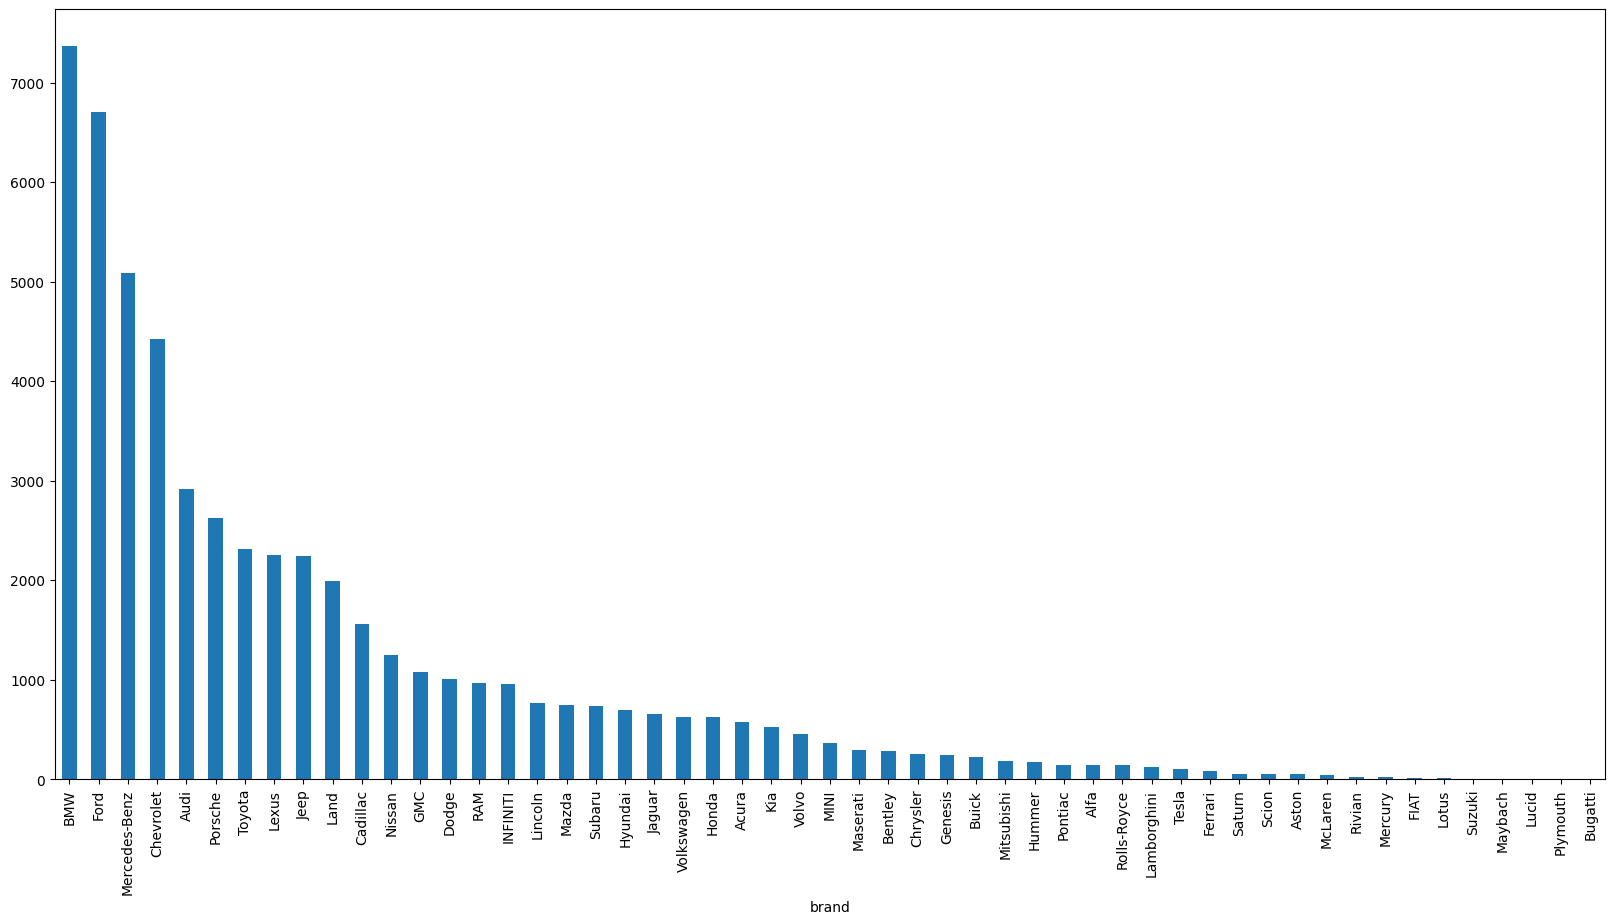

In [52]:
train['brand'].value_counts().plot(kind='bar',figsize=(20,10),stacked=False)
plt.show()

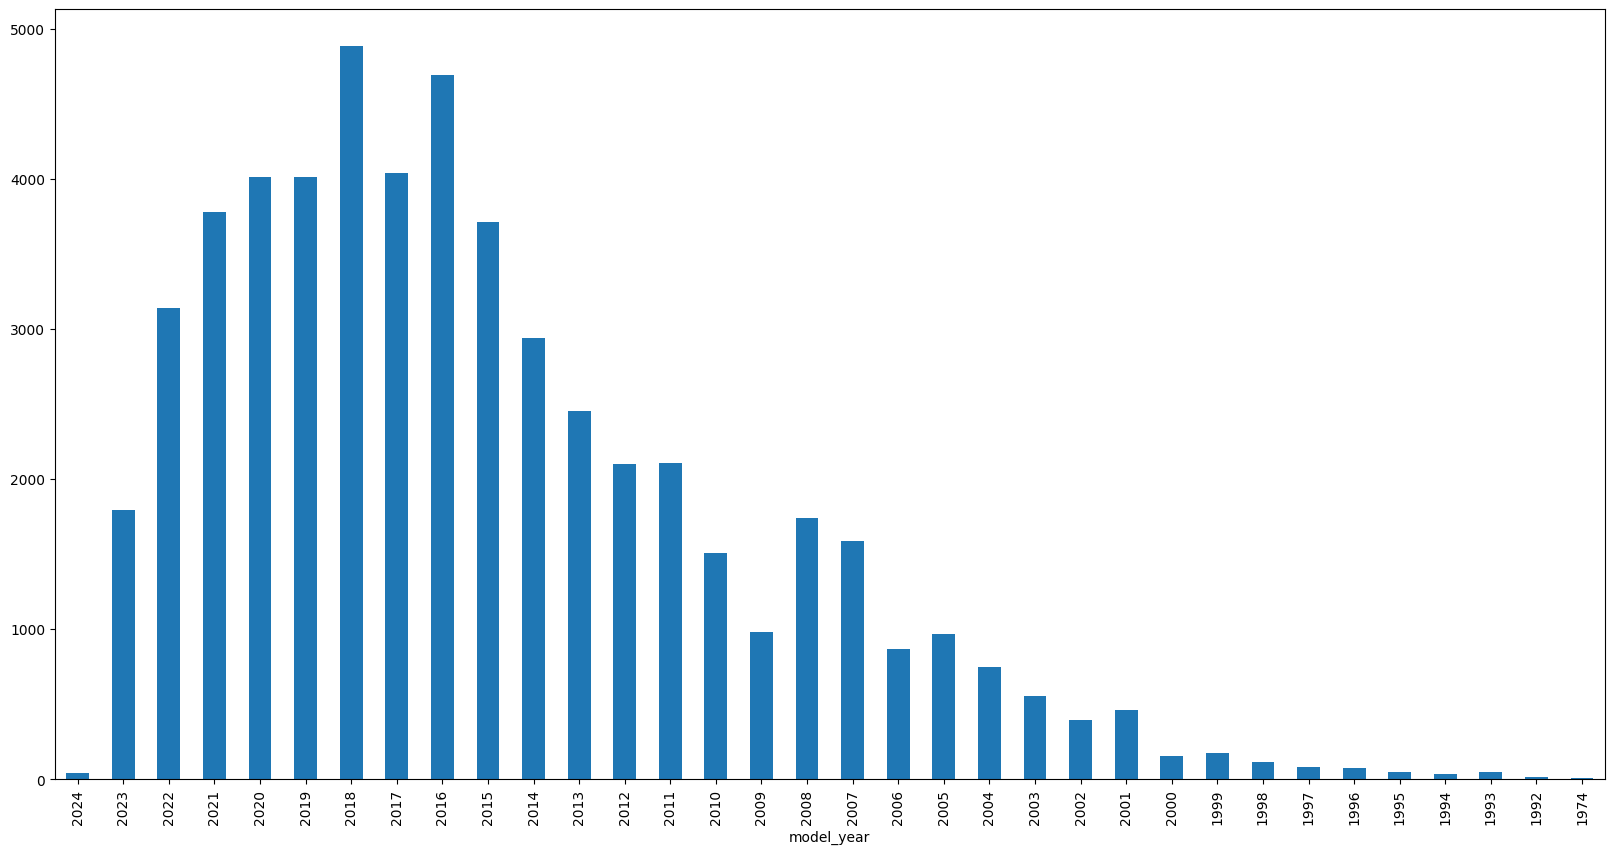

In [53]:
train['model_year'].value_counts().sort_index(ascending=False).plot(kind='bar',figsize=(20,10),stacked=False)
plt.show()

<Axes: >

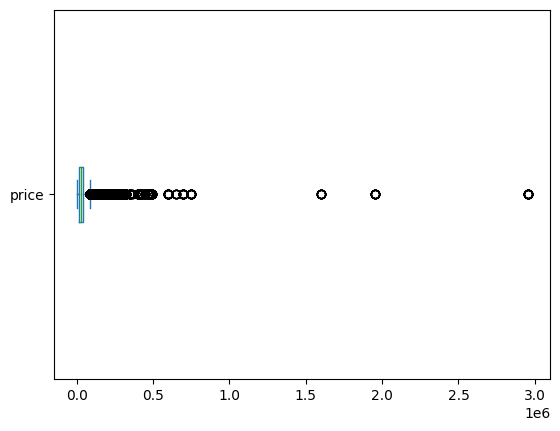

In [54]:
train['price'].plot(kind='box',vert=False)

Text(0.5, 1.0, 'Car Price Distribution Plot')

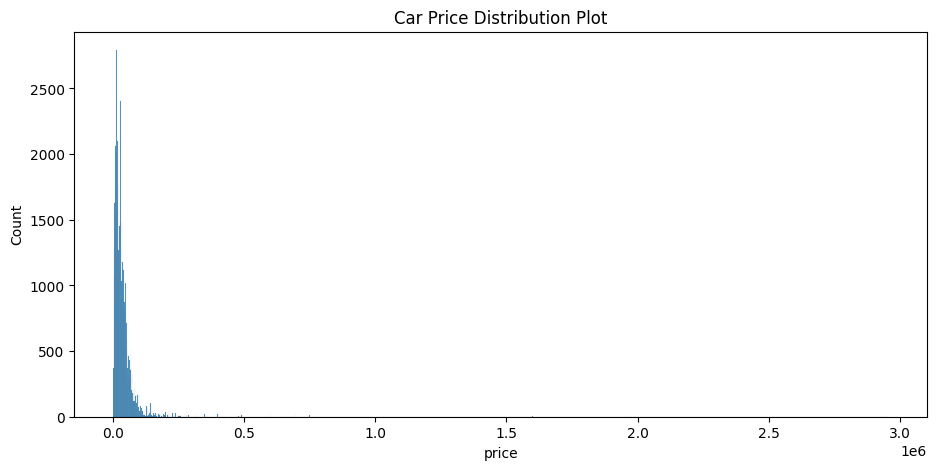

In [55]:
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[11,5])
sns.histplot(train['price'])
plt.title('Car Price Distribution Plot')

<Axes: >

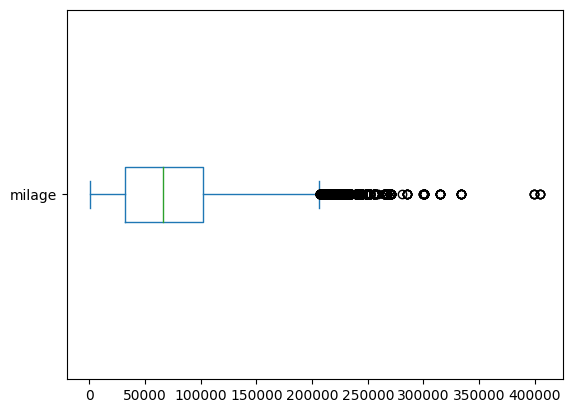

In [56]:
train['milage'].plot(kind='box',vert=False)

In [57]:
price_iqr=iqr(train['price'])
price_q1,price_q3=np.quantile(train['price'],[0.25,0.59])

train.loc[train['price']<price_q1-1.5*price_iqr,'price']=np.nan
train.loc[train['price']>price_q3+1.5*price_iqr,'price']=np.nan

# train = train[(train['price'] >= price_q3+1.5*price_iqr) & (train['price'] <= price_q1-1.5*price_iqr)]
train.isna().sum()

brand                   0
model                   0
model_year              0
milage                  0
fuel_type               0
ext_col                 0
int_col                 0
accident                0
price                4410
transmission_mode      66
age                     0
engine_size_cm3         0
cylinder_count          0
horsepower_HP           0
turbocharged            0
dtype: int64

In [58]:
train.dropna(inplace=True)
train.shape

(49805, 15)

<Axes: >

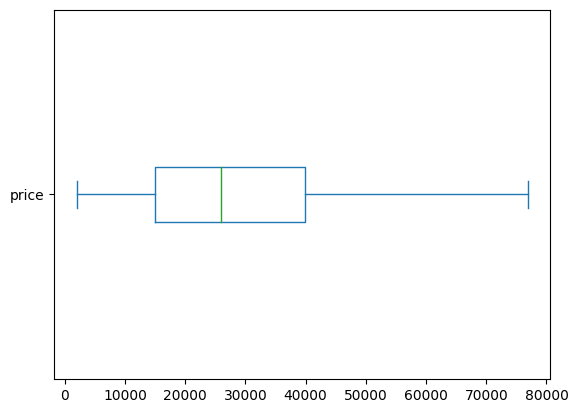

In [59]:
train['price'].plot(kind='box',vert=False)

<ipython-input-60-846f12fc8c65>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['price'])


Text(0.5, 1.0, 'Car Price Distribution Plot')

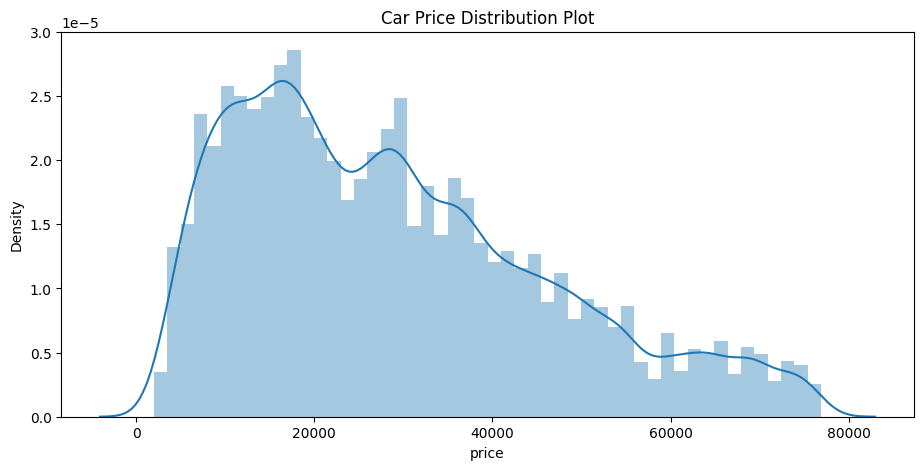

In [60]:
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[11,5])
sns.distplot(train['price'])
plt.title('Car Price Distribution Plot')

<Axes: >

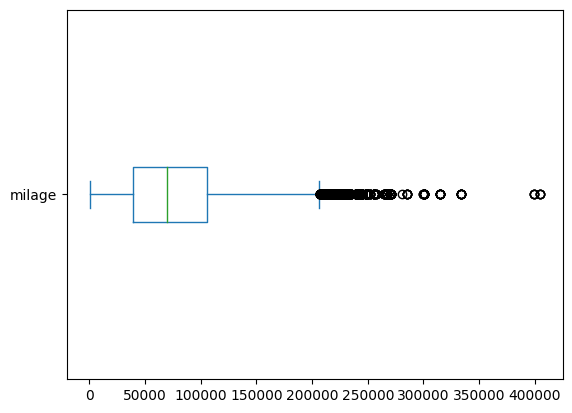

In [61]:
train['milage'].plot(kind='box',vert=False)

In [62]:
year_q1,year_q3=np.quantile(train['milage'],[0.25,0.70])

milage_igr=iqr(train['milage'])
train=train[(train['milage'] <= year_q3+1.5*milage_igr) & (train['milage'] >= year_q1-1.5*milage_igr)]
train.shape

(48848, 15)

<Axes: >

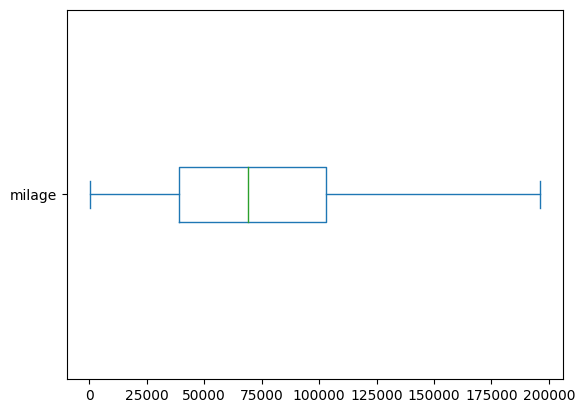

In [63]:
train['milage'].plot(kind='box',vert=False)

<Axes: >

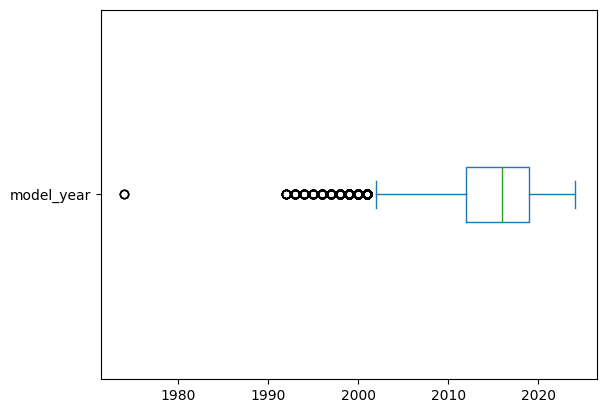

In [64]:
train['model_year'].plot(kind='box',vert=False)

In [65]:
year_q1,year_q3=np.quantile(train['model_year'],[0.30,0.95])

year_igr=iqr(train['model_year'])
train=train[(train['model_year'] <= year_q3+1.5*year_igr) & (train['model_year'] >= year_q1-1.5*year_igr)]
train.shape

(47439, 15)

<Axes: >

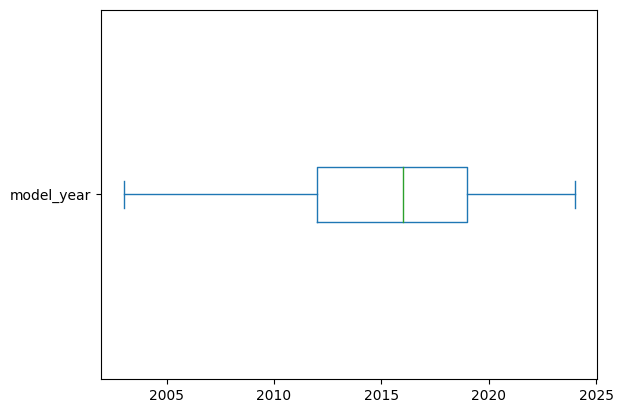

In [66]:
train['model_year'].plot(kind='box',vert=False)

<Axes: >

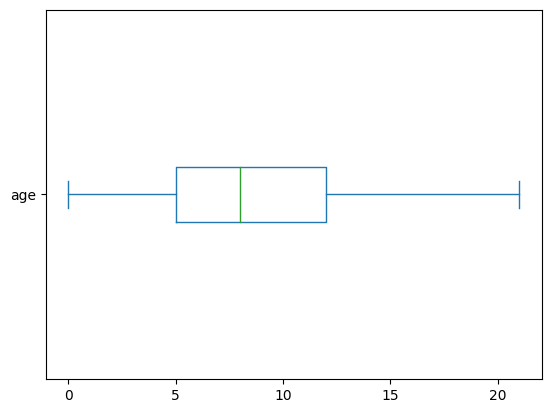

In [67]:
train['age'].plot(kind='box',vert=False)

<Axes: >

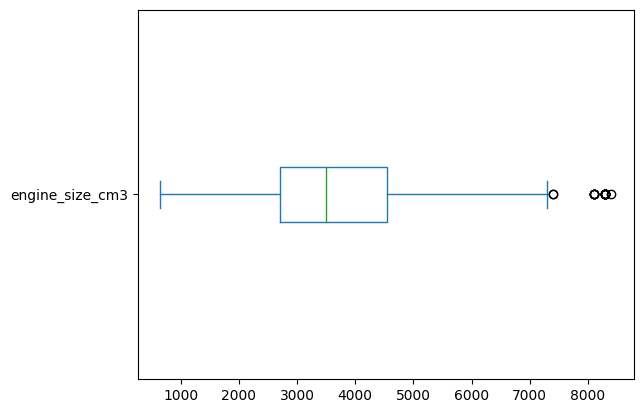

In [69]:
train['engine_size_cm3'].plot(kind='box',vert=False)

In [74]:

train=train[(train['engine_size_cm3'] <= 6900)]
train.shape

(47351, 15)

<Axes: >

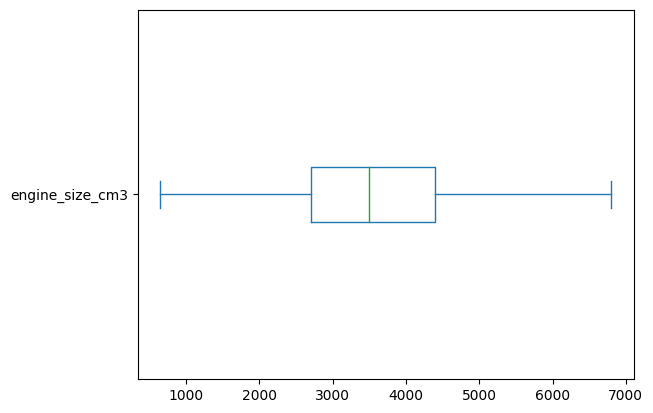

In [75]:
train['engine_size_cm3'].plot(kind='box',vert=False)

<Axes: >

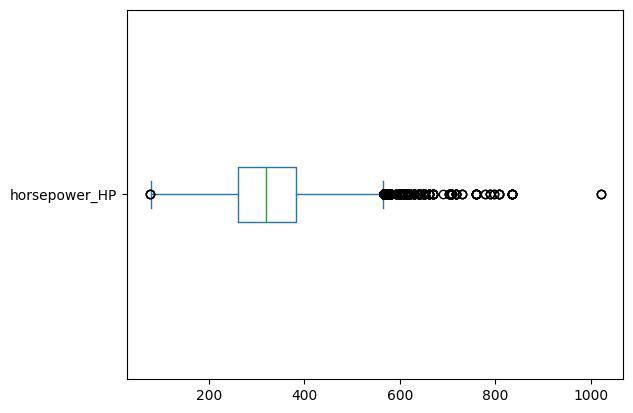

In [76]:
train['horsepower_HP'].plot(kind='box',vert=False)

In [81]:
# year_q1,year_q3=np.quantile(train['horsepower_HP'],[0.05,0.95])

# year_igr=iqr(train['horsepower_HP'])
train=train[(train['horsepower_HP'] <= 550) & (train['horsepower_HP'] >= 90)]
train.shape

(45890, 15)

<Axes: >

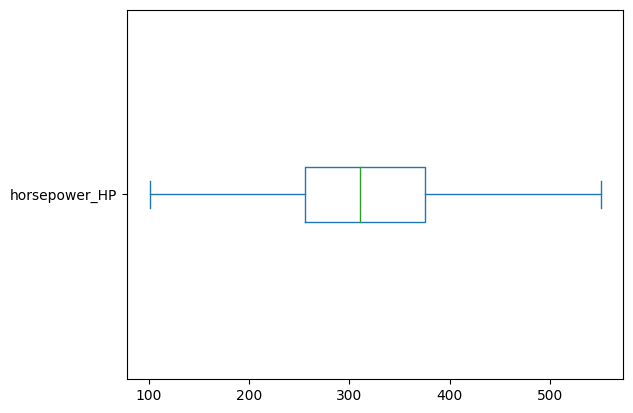

In [82]:
train['horsepower_HP'].plot(kind='box',vert=False)

In [ ]:
for df in [train,test]:
  df.drop(columns=['model_year', 'transmission'],axis=1,inplace=True)

In [ ]:
# lets check the linearity using a scatter plot
#Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(x='model_year',y='price',data=train)

plt.subplot(1,3,2)
plt.title("Price and age")
sns.scatterplot(x='price',y='milage',data=train)



In [ ]:
sns.histplot(train['price'])

In [ ]:
test.describe()

In [ ]:
train.describe()

In [ ]:
# transform numeric columns using square root
numeric_columns=train.select_dtypes(include=['int64','float64']).columns.drop('price').tolist()
for df in [train,test]:
  for col in numeric_columns:
    df[f'{col}_transformed']=np.sqrt(df[col])
    df.drop(columns=[col],axis=1,inplace=True)

# transform target columns using square root

# train['price']=np.sqrt(train['price'])



In [ ]:
def test_mean_target_encoding(train, test, target, categorical, alpha=5):
    # Calculate global mean on the train data
    global_mean = train[target].mean()

    # Group by the categorical feature and calculate its properties
    train_groups = train.groupby(categorical)
    category_sum = train_groups[target].sum()
    category_size = train_groups.size()

    # Calculate smoothed mean target statistics
    train_statistics = (category_sum + global_mean * alpha) / (category_size + alpha)

    # Apply statistics to the test data and fill new categories
    test_feature = test[categorical].map(train_statistics).fillna(global_mean)
    return test_feature.values

In [ ]:
def train_mean_target_encoding(train, target, categorical, alpha=5):
    # Create 5-fold cross-validation
    kf = KFold(n_splits=5, random_state=123, shuffle=True)
    train_feature = pd.Series(index=train.index)

    # For each folds split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]

        # Calculate out-of-fold statistics and apply to cv_test
        cv_test_feature = test_mean_target_encoding(cv_train, cv_test, target, categorical, alpha)
        cv_test_feature.shape

        # Save new feature for this particular fold
        train_feature.iloc[test_index] = cv_test_feature
    return train_feature.values

In [ ]:
def mean_target_encoding(train, test, target, categorical, alpha=5):

    # Get the train feature
    train_feature = train_mean_target_encoding(train, target, categorical, alpha)

    # Get the test feature
    test_feature = test_mean_target_encoding(train, test, target, categorical, alpha)

    # Return new features to add to the model
    return train_feature, test_feature

In [ ]:
categorical_columns = train.select_dtypes(include=['object', 'category']).columns.tolist()
for i in categorical_columns:
  train_feature, test_feature=mean_target_encoding(train,test,target='price',categorical=i,alpha=5)
  train[i]=train_feature
  test[i]=test_feature

In [ ]:
train.describe()

In [ ]:
train.info()

In [ ]:
for df in [train,test]:
  print(df.shape)

In [ ]:
plt.figure(figsize=(20,12))
mask = np.triu(np.ones_like(train.corr(numeric_only=True), dtype=bool))
sns.heatmap(data=train.corr(numeric_only=True),annot=True,cmap='coolwarm' ,mask=mask)


In [ ]:
# for df in [train,test]:
  # df.drop(columns=['cylinder_count'],axis=1, inplace=True)

In [ ]:
plt.figure(figsize=(20,12))

mask = np.triu(np.ones_like(train.corr(numeric_only=True), dtype=bool))
sns.heatmap(data=train.corr(numeric_only=True),annot=True,cmap='coolwarm' ,mask=mask)


In [ ]:
train[train.select_dtypes(include=['int64','float64']).columns.tolist()].hist(figsize=(20,20))

In [ ]:
# sns.pairplot(train)


In [ ]:
train.head(1)

In [ ]:
for df in [train,test]:
  df.drop('model',axis=1,inplace=True)

In [ ]:
train.info()

In [ ]:
# sns.pairplot(data=train)

In [ ]:
train_dummies = pd. get_dummies(train, columns=train.select_dtypes(include=['object', 'category']).columns.tolist(), drop_first=True,dtype=int)
test_dummies = pd.get_dummies(test, columns=test.select_dtypes(include=['object', 'category']).columns.tolist(), drop_first=True,dtype=int)


In [ ]:
for df in [train_dummies,test_dummies]:
  print(df.shape)

In [ ]:
for col in train_dummies.columns:
  if col not in test_dummies.columns:
    test_dummies[col]=0

for col in test_dummies.columns:
  if col not in train_dummies.columns:
    train_dummies[col]=0

test_dummies.drop('price',axis=1,inplace=True)
test_dummies.sort_index(axis=1,inplace=True)
train_dummies.sort_index(axis=1,inplace=True)

In [ ]:
for df in [train_dummies,test_dummies]:
  print(df.shape)

In [ ]:
X=train.drop(columns=['price'],axis=1)
y=train['price']

In [ ]:
train_dummies.head(1)

In [ ]:
train.shape


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1111)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)


In [ ]:
train.columns

In [ ]:


# Training the model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)

# Calculating RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# Calculating R² score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

feature_importances_df=pd.DataFrame(data={
    'Attribute':X_train.columns,
    'Importance':model.feature_importances_
})
feature_importances_df.sort_values(by='Importance',ascending=False,inplace=True)
feature_importances_df

In [ ]:
# y_test_pred=model.predict(scaler.transform(test_dummies))

# submision = pd.DataFrame({'id': test.index, 'price': y_test_pred**2})
# submision.to_csv('submission.csv', index=False)

In [ ]:
# Find the best model

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import lightgbm as lgbm
from lightgbm import LGBMRegressor


models = {
    'Linear Regression Model': LinearRegression(),
    'Random Forest Model': RandomForestRegressor(),
    'Gradient Boosted Trees Model': GradientBoostingRegressor(),
    'Cart Model': DecisionTreeRegressor(),
    'Distributed Gradient Boosted Trees Model': HistGradientBoostingRegressor(),
    'Ridge Model': Ridge(),
    'Lasso Model': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'XGB': XGBRegressor(),
    'LGBM': LGBMRegressor()
}

best_r2 = float(0)
best_model = None

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results[name] = [r2,rmse]
    print(f"{name} R2: {r2:.4f}")

    if r2 > best_r2:
        best_r2 = r2
        best_model = model

print(f"\nBest Model: {type(best_model).__name__} with r2: {best_r2:.4f}")

In [ ]:
results

In [ ]:

# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Initializing GridSearchCV
grid_search = GrridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fitting the grid search
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluating the best model
y_pred_best = best_model.predict(X_test)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best RMSE: {rmse_best}')
print(f'Best R² Score: {r2_best}')


In [ ]:
# Create 5-fold cross-validation
kf = KFold(n_splits=5, random_state=123, shuffle=True)

# For each folds split
for train_index, test_index in kf.split(df):
    cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]

    # Create mean target encoded feature
    cv_train['game_id_enc'], cv_test['game_id_enc'] = mean_target_encoding(train=cv_train,
                                                                           test=cv_test,
                                                                           target='shot_made_flag',
                                                                           categorical='game_id',
                                                                           alpha=5)
    # Look at the encoding
    print(cv_train[['game_id', 'shot_made_flag', 'game_id_enc']].sample(n=1))

In [ ]:
# Create mean target encoded feature
train['RoofStyle_enc'], test['RoofStyle_enc'] = mean_target_encoding(train=train,
                                                                     test=test,
                                                                     target='SalePrice',
                                                                     categorical='RoofStyle',
                                                                     alpha=10)

# Look at the encoding
print(test[['RoofStyle', 'RoofStyle_enc']].drop_duplicates())

In [ ]:
# 2d hyperparameter tuning

import itertools

# Hyperparameter grids
max_depth_grid = [3,5,7]
subsample_grid = [0.8,0.9,1.0]
results = {}

# For each couple in the grid
for max_depth_candidate, subsample_candidate in itertools.product(max_depth_grid, subsample_grid):
    params = {'max_depth': max_depth_candidate,
              'subsample': subsample_candidate}
    validation_score = get_cv_score(train, params)
    # Save the results for each couple
    results[(max_depth_candidate, subsample_candidate)] = validation_score
print(results)